In [1]:


from pathlib import Path

# sample_file = r"img-1_scId-6fa0b138-b757-471c-939e-a4e44dc46c43.tif"
sample_file = r"img-106_scId-2141997d-1169-4e32-8242-ad1f729879ad.tif"
data_dir = Path(r"/home/ken67/livecellx/notebooks/notebook_results/a549_ccp_vim/train_data_v15/cxa_process2_underseg_cases")

gt_label_mask_path = data_dir / "gt_label_mask" / sample_file
raw_transformed_img_path = data_dir / "raw_transformed_img" / ("aug-0-" + str(sample_file))
assert gt_label_mask_path.exists()
assert raw_transformed_img_path.exists()

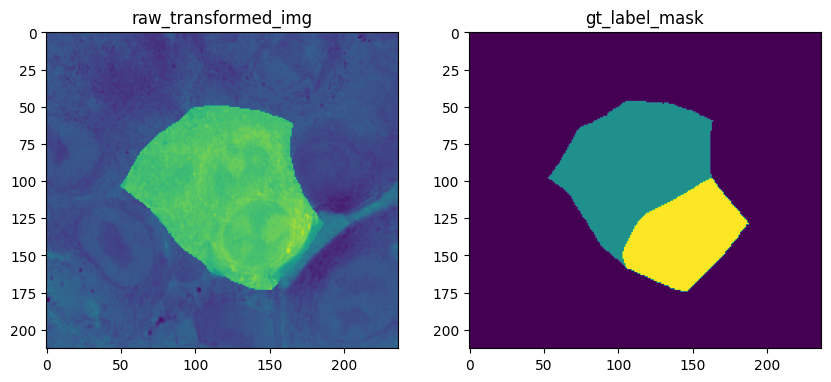

In [2]:
from PIL import Image
import numpy as np
raw_transformed_img = np.array(Image.open(raw_transformed_img_path)) 

import matplotlib.pyplot as plt
# plt.imshow(raw_transformed_img)
# plt.title("raw_transformed_img")
# plt.show()

gt_label_mask = np.array(Image.open(gt_label_mask_path))
# plt.imshow(gt_label_mask)
# plt.title("gt_label_mask")
# plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(raw_transformed_img)
axes[0].set_title("raw_transformed_img")
axes[1].imshow(gt_label_mask)
axes[1].set_title("gt_label_mask")
plt.show()

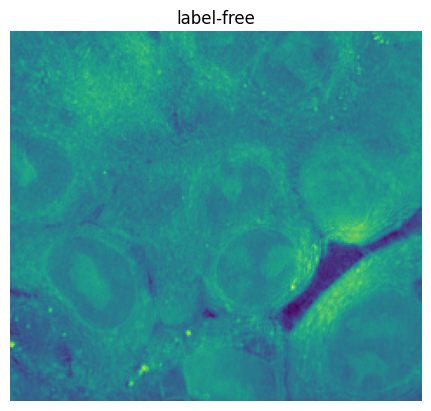

In [3]:
plt.imshow(np.abs(raw_transformed_img))
plt.title("label-free")
# Axis off
plt.axis("off")

plt.show()



2024-09-25 17:21:53.992744: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-25 17:21:53.992777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 17:21:53.993890: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-25 17:21:53.998972: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-25 17:21:54.628968: W tensorflow/compiler/tf2

5


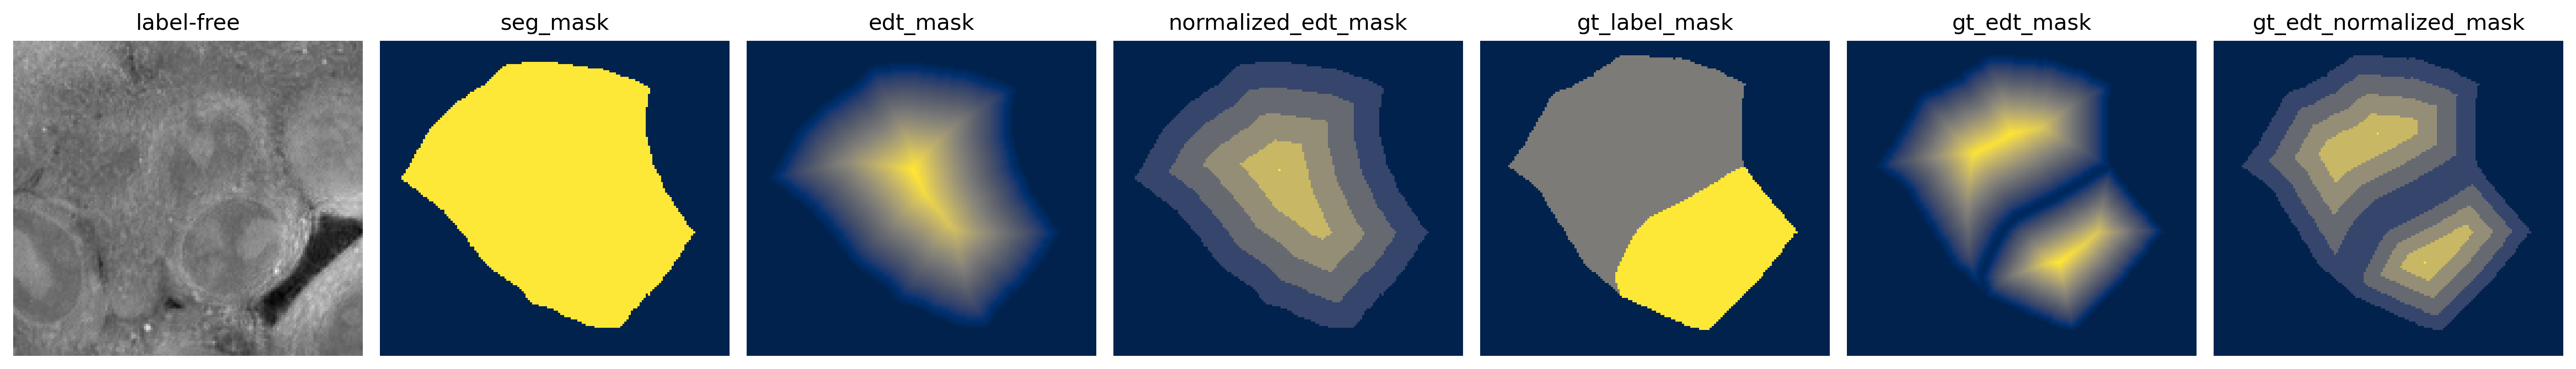

In [5]:
from livecellx.core.utils import label_mask_to_edt_mask
from livecellx.preprocess.utils import normalize_edt
import matplotlib.pyplot as plt

# Define the colormap
colormap = 'cividis'
# colormap = 'viridis'

seg_mask = raw_transformed_img > 0
edt_mask = label_mask_to_edt_mask(seg_mask)
normalized_edt_mask = normalize_edt(edt_mask, edt_max=5)
gt_edt_mask = label_mask_to_edt_mask(gt_label_mask)
gt_edt_normalized_mask = normalize_edt(gt_edt_mask, edt_max=5)

bbox = [40, 40, seg_mask.shape[0] - 10, seg_mask.shape[1]-50]

# Take the bbox from the masks
seg_mask_ = seg_mask[bbox[1]:bbox[3], bbox[0]:bbox[2]]
edt_mask_ = edt_mask[bbox[1]:bbox[3], bbox[0]:bbox[2]]
normalized_edt_mask_ = normalized_edt_mask[bbox[1]:bbox[3], bbox[0]:bbox[2]]
gt_label_mask_ = gt_label_mask[bbox[1]:bbox[3], bbox[0]:bbox[2]]
gt_edt_mask_ = gt_edt_mask[bbox[1]:bbox[3], bbox[0]:bbox[2]]
gt_edt_normalized_mask_ = gt_edt_normalized_mask[bbox[1]:bbox[3], bbox[0]:bbox[2]]

raw_img_ = raw_transformed_img[bbox[1]:bbox[3], bbox[0]:bbox[2]]

print(max(normalized_edt_mask_.flatten()))

# Show 7 masks (label-free, seg, edt, normed_edt, gt_label, gt_edt, gt_edt_normalized)
fig, axes = plt.subplots(1, 7, figsize=(25, 5), dpi=300)
axes[0].imshow(np.abs(raw_img_), cmap="gray")
axes[0].set_title("label-free")
axes[1].imshow(seg_mask_, cmap=colormap)
axes[1].set_title("seg_mask")
axes[2].imshow(edt_mask_, cmap=colormap)
axes[2].set_title("edt_mask")
axes[3].imshow(normalized_edt_mask_, cmap=colormap)
axes[3].set_title("normalized_edt_mask")
axes[4].imshow(gt_label_mask_, cmap=colormap)
axes[4].set_title("gt_label_mask")
axes[5].imshow(gt_edt_mask_, cmap=colormap)
axes[5].set_title("gt_edt_mask")
axes[6].imshow(gt_edt_normalized_mask_, cmap=colormap)
axes[6].set_title("gt_edt_normalized_mask")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.1)

# Remove axis
for ax in axes:
    ax.axis("off")
plt.show()

In [16]:
# Calculate edt based on segmask and functions from skimage
# use ndimage.distance_transform_edt(tmp_mask)
from scipy import ndimage
from skimage import morphology
from skimage.measure import label
from skimage.segmentation import watershed

# Calculate the distance transform
edt = ndimage.distance_transform_edt(gt_label_mask == 1)
max(edt.flatten())

36.124783736376884